In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.stats import beta, binom

In [108]:
n = 20
flips = np.random.randint(0, 2, n)

In [109]:
points = np.linspace(start=0, stop=1, num=100)
likelihood = lambda x, t, f: (x ** t) * (1 - x) ** f

In [110]:
heads = np.count_nonzero(flips)
tails = n - heads

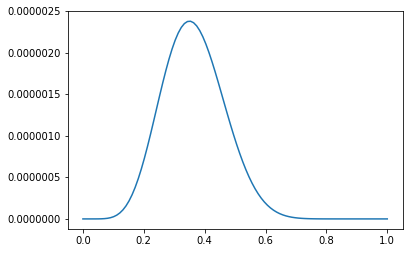

In [111]:
plt.plot(points, [likelihood(x, heads, tails) for x in points])
plt.show()

In [112]:
alfa_heads = 10
alfa_tails = 10

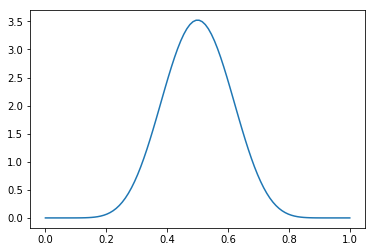

In [113]:
# prior = lambda x, t, f: gamma(t + f) / (gamma(t)*gamma(f)) * (x ** (t - 1)) * (1 - x) ** (f - 1)
# plt.plot(points, [prior(x, alfa_heads, alfa_tails) for x in points])
prior = beta(alfa_heads, alfa_tails)
plt.plot(points, [prior.pdf(x) for x in points])
plt.show()

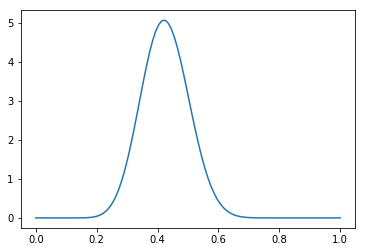

In [114]:
posterior = beta(heads + alfa_heads, tails + alfa_tails)
plt.plot(points, [posterior.pdf(x) for x in points])
plt.show()

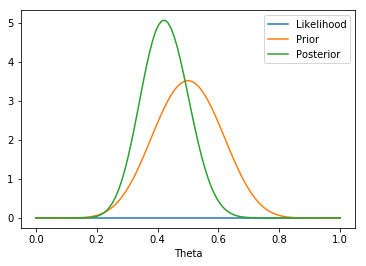

In [115]:
plt.plot(points, [likelihood(x, heads, tails) for x in points])
plt.plot(points, [prior.pdf(x) for x in points])
plt.plot(points, [posterior.pdf(x) for x in points])
plt.legend(['Likelihood', 'Prior', 'Posterior'])
plt.xlabel('Theta')
plt.show()

Como se observa, lo que falta es escalar correctamente la _likelihood_ porque es una función que no necesariamente integra 1. Como se explicó, es una beta sin la normalización de las gammas, y por eso lo que se puede hacer es:

In [116]:
likelihood_normalized = beta(heads, tails)

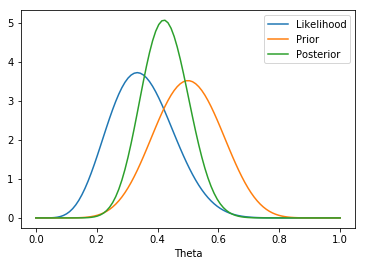

In [117]:
plt.plot(points, [likelihood_normalized.pdf(x) for x in points])
plt.plot(points, [prior.pdf(x) for x in points])
plt.plot(points, [posterior.pdf(x) for x in points])
plt.legend(['Likelihood', 'Prior', 'Posterior'])
plt.xlabel('Theta')
plt.show()

Ahora lo que se puede hacer es jugar con los parámetros para ver como varía la posterior en base a los datos del likelihood y el prior.

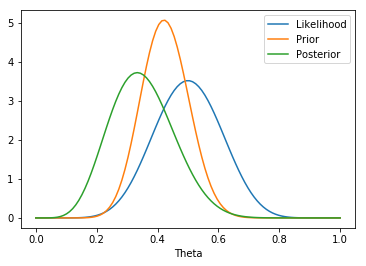

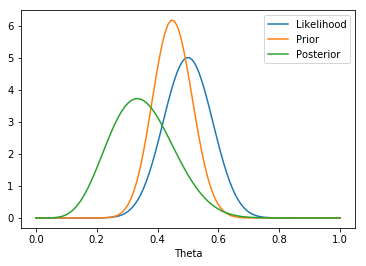

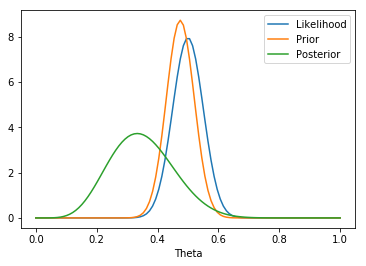

In [122]:
for a_h, a_t in [(10, 10), (20, 20), (50, 50)]:
    prior = beta(a_h, a_t)
    posterior = beta(heads + a_h, tails + a_h)
    plt.plot(points, [prior.pdf(x) for x in points])
    plt.plot(points, [posterior.pdf(x) for x in points])
    plt.plot(points, [likelihood_normalized.pdf(x) for x in points])
    plt.legend(['Likelihood', 'Prior', 'Posterior'])
    plt.xlabel('Theta')
    plt.show()

Se observa que mientras más datos se le da al prior, mayor peso tiene por lo que la posterior tiende mucho más al prior que al likelihood, que tiene pocos datos. En este caso como están equilibrados (50% para cada caso) los alfas se acerca al centro, que es 0.5